## Fetch Data

In [49]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import statistics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [50]:
# read data
filePath = '/home/ubuntu/amine/forecaster/paper_experiments/datasets/beijing-multisite-airquality-data-set'
allFiles = glob.glob(filePath + "/*.csv")
dataFrames = []
for i in allFiles:
    df = pd.read_csv(i, index_col=None, header=0)
    dataFrames.append(df)
data = pd.concat(dataFrames)
data

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0  3.0   NaN  200.0  82.0   
1          2  2013      3    1     1    7.0   7.0  3.0   NaN  200.0  80.0   
2          3  2013      3    1     2    5.0   5.0  3.0   2.0  200.0  79.0   
3          4  2013      3    1     3    6.0   6.0  3.0   NaN  200.0  79.0   
4          5  2013      3    1     4    5.0   5.0  3.0   NaN  200.0  81.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   14.0  58.0  4.0  19.0  500.0  56.0   
35060  35061  2017      2   28    20   27.0  83.0  6.0  60.0  700.0  26.0   
35061  35062  2017      2   28    21   22.0  37.0  7.0  52.0  600.0  27.0   
35062  35063  2017      2   28    22    9.0  23.0  3.0  13.0  400.0  57.0   
35063  35064  2017      2   28    23   12.0  48.0  5.0  48.0  600.0  28.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1      -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2      -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3      -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4      -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...     ...     ...   ...   ...  ...   ...       ...  
35059  12.8  1009.9 -17.0   0.0  NNW   3.1   Gucheng  
35060  11.1  1010.4 -15.5   0.0   NW   1.9   Gucheng  
35061  10.5  1010.8 -15.9   0.0    N   2.3   Gucheng  
35062   8.9  1010.9 -14.9   0.0   NE   1.6   Gucheng  
35063   6.2  1010.5 -13.4   0.0  NNE   0.7   Gucheng  

[420768 rows x 18 columns]

In [51]:
# drop the row no column and rename the columns
data.drop(["No"], axis=1, inplace=True)
data.rename(columns = {'year': 'Year',
                       'month': 'Month',
                       'day': "Day",
                       'hour': 'Hour',
                       'pm2.5': 'PM2.5',
                       'DEWP': 'DewP',
                       'TEMP': 'Temp',
                       'PRES': 'Press',
                       'RAIN': 'Rain',
                       'wd': 'WinDir',
                       'WSPM': 'WinSpeed',
                       'station': 'Station'}, inplace = True)
data

Year  Month  Day  Hour  PM2.5  PM10  SO2   NO2     CO    O3  Temp  \
0      2013      3    1     0    4.0   4.0  3.0   NaN  200.0  82.0  -2.3   
1      2013      3    1     1    7.0   7.0  3.0   NaN  200.0  80.0  -2.5   
2      2013      3    1     2    5.0   5.0  3.0   2.0  200.0  79.0  -3.0   
3      2013      3    1     3    6.0   6.0  3.0   NaN  200.0  79.0  -3.6   
4      2013      3    1     4    5.0   5.0  3.0   NaN  200.0  81.0  -3.5   
...     ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   ...   
35059  2017      2   28    19   14.0  58.0  4.0  19.0  500.0  56.0  12.8   
35060  2017      2   28    20   27.0  83.0  6.0  60.0  700.0  26.0  11.1   
35061  2017      2   28    21   22.0  37.0  7.0  52.0  600.0  27.0  10.5   
35062  2017      2   28    22    9.0  23.0  3.0  13.0  400.0  57.0   8.9   
35063  2017      2   28    23   12.0  48.0  5.0  48.0  600.0  28.0   6.2   

        Press  DewP  Rain WinDir  WinSpeed   Station  
0      1020.8 -19.7   0.0      E       0.5  Dingling  
1      1021.3 -19.0   0.0    ENE       0.7  Dingling  
2      1021.3 -19.9   0.0    ENE       0.2  Dingling  
3      1021.8 -19.1   0.0    NNE       1.0  Dingling  
4      1022.3 -19.4   0.0      N       2.1  Dingling  
...       ...   ...   ...    ...       ...       ...  
35059  1009.9 -17.0   0.0    NNW       3.1   Gucheng  
35060  1010.4 -15.5   0.0     NW       1.9   Gucheng  
35061  1010.8 -15.9   0.0      N       2.3   Gucheng  
35062  1010.9 -14.9   0.0     NE       1.6   Gucheng  
35063  1010.5 -13.4   0.0    NNE       0.7   Gucheng  

[420768 rows x 17 columns]

In [52]:
# check the null data
data.isnull().sum()

Year            0
Month           0
Day             0
Hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
Temp          398
Press         393
DewP          403
Rain          390
WinDir       1822
WinSpeed      318
Station         0
dtype: int64

In [53]:
# fill the null values in numerical columns with average specific to certain column
# fill in the missing data in the columns according to the Month average.
unique_Month = pd.unique(data.Month)

# find PM2_5 averages in Month specific
# Equalize the average PM2.5 values to the missing values in PM2_5 specific to Month
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ["PM2.5", 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'WinSpeed'] # it can be add more column
for c in unique_Month:
    
    # create Month filter
    Month_filtre = temp_data.Month == c
    # filter data by Month
    fitered_data = temp_data[Month_filtre]
    
    # find average for PM2_5 in specific to Month
    for s in columns:
        mean = np.round(np.mean(fitered_data[s]), 2)
        if ~np.isnan(mean): # if there if average specific to Month
            fitered_data[s] = fitered_data[s].fillna(mean)
            print(f"Missing Value in {s} column fill with {mean} when Month:{c}")
        else: # find average for all data if no average in specific to Month
            all_data_mean = np.round(np.mean(data[s]),2)
            fitered_data[s] = fitered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column fill with {all_data_mean}")
    # Synchronize data filled with missing values in PM2.5 to data temporary            
    temp_data[Month_filtre] = fitered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Missing Value in PM2.5 column fill with 94.66 when Month:3
Missing Value in PM10 column fill with 136.04 when Month:3
Missing Value in SO2 column fill with 28.0 when Month:3
Missing Value in NO2 column fill with 60.12 when Month:3
Missing Value in CO column fill with 1310.23 when Month:3
Missing Value in O3 column fill with 51.04 when Month:3
Missing Value in Temp column fill with 8.35 when Month:3
Missing Value in Press column fill with 1013.96 when Month:3
Missing Value in DewP column fill with -7.95 when Month:3
Missing Value in Rain column fill with 0.01 when Month:3
Missing Value in WinSpeed column fill with 1.98 when Month:3
Missing Value in PM2.5 column fill with 72.73 when Month:4
Missing Value in PM10 column fill with 116.96 when Month:4
Missing Value in SO2 column fill with 14.22 when Month:4
Missing Value in NO2 column fill with 47.28 when Month:4
Missing Value in CO column fill with 840.49 when Month:4
Missing Value in O3 column fill with 70.19 when Month:4
Missing Value in

In [54]:
# fill the null values in categorical columns with mode specific to certain column

# fill in the missing data in the WinDir column with mode values according to the Station.
unique_Station = pd.unique(data.Station)

# find columns mode value in WinDir column according to Station column specific
# Equalize the mode values of columns to the missing values
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ["WinDir"] # it can be add more column
for c in unique_Station:
    
    # create Station filter
    Station_filtre = temp_data.Station == c
    
    # filter data by Station
    filtered_data = temp_data[Station_filtre]
    
    # find mode for WinDir specific to Station
    for column in columns:
        mode = statistics.mode(filtered_data[column])
        filtered_data[column] = filtered_data[column].fillna(mode)
        print(f"Missing Value in {column} column fill with {mode} when Station:{c}")

    # Synchronize data filled with missing values in WinDir to data temporary            
    temp_data[Station_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Missing Value in WinDir column fill with NNW when Station:Dingling
Missing Value in WinDir column fill with NNE when Station:Shunyi
Missing Value in WinDir column fill with NNW when Station:Changping
Missing Value in WinDir column fill with NW when Station:Huairou
Missing Value in WinDir column fill with NE when Station:Guanyuan
Missing Value in WinDir column fill with ENE when Station:Tiantan
Missing Value in WinDir column fill with NE when Station:Wanliu
Missing Value in WinDir column fill with ENE when Station:Nongzhanguan
Missing Value in WinDir column fill with NE when Station:Aotizhongxin
Missing Value in WinDir column fill with NE when Station:Wanshouxigong
Missing Value in WinDir column fill with ENE when Station:Dongsi
Missing Value in WinDir column fill with N when Station:Gucheng


In [55]:
# creating date field for further analysis by extracting day of the week, month etc.
data['Date']=pd.to_datetime(data[['Year', 'Month', 'Day']])
data.tail()

Year  Month  Day  Hour  PM2.5  PM10  SO2   NO2     CO    O3  Temp  \
35059  2017      2   28    19   14.0  58.0  4.0  19.0  500.0  56.0  12.8   
35060  2017      2   28    20   27.0  83.0  6.0  60.0  700.0  26.0  11.1   
35061  2017      2   28    21   22.0  37.0  7.0  52.0  600.0  27.0  10.5   
35062  2017      2   28    22    9.0  23.0  3.0  13.0  400.0  57.0   8.9   
35063  2017      2   28    23   12.0  48.0  5.0  48.0  600.0  28.0   6.2   

        Press  DewP  Rain WinDir  WinSpeed  Station       Date  
35059  1009.9 -17.0   0.0    NNW       3.1  Gucheng 2017-02-28  
35060  1010.4 -15.5   0.0     NW       1.9  Gucheng 2017-02-28  
35061  1010.8 -15.9   0.0      N       2.3  Gucheng 2017-02-28  
35062  1010.9 -14.9   0.0     NE       1.6  Gucheng 2017-02-28  
35063  1010.5 -13.4   0.0    NNE       0.7  Gucheng 2017-02-28

In [56]:
# function to find day of the week based on the date field
import calendar
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [ ]:
data['DayNames'] = data['Date'].apply(lambda x: findDay(x))
data.head()

Year  Month  Day  Hour  PM2.5  PM10  SO2    NO2     CO    O3  Temp   Press  \
0  2013      3    1     0    4.0   4.0  3.0  60.12  200.0  82.0  -2.3  1020.8   
1  2013      3    1     1    7.0   7.0  3.0  60.12  200.0  80.0  -2.5  1021.3   
2  2013      3    1     2    5.0   5.0  3.0   2.00  200.0  79.0  -3.0  1021.3   
3  2013      3    1     3    6.0   6.0  3.0  60.12  200.0  79.0  -3.6  1021.8   
4  2013      3    1     4    5.0   5.0  3.0  60.12  200.0  81.0  -3.5  1022.3   

   DewP  Rain WinDir  WinSpeed   Station       Date DayNames  
0 -19.7   0.0      E       0.5  Dingling 2013-03-01   Friday  
1 -19.0   0.0    ENE       0.7  Dingling 2013-03-01   Friday  
2 -19.9   0.0    ENE       0.2  Dingling 2013-03-01   Friday  
3 -19.1   0.0    NNE       1.0  Dingling 2013-03-01   Friday  
4 -19.4   0.0      N       2.1  Dingling 2013-03-01   Friday

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fa27e2bb850>>
Traceback (most recent call last):
  File "/home/ubuntu/amine/forecaster/forecaster/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Year  Month  Day  Hour  PM2.5  PM10  SO2    NO2     CO    O3  Temp   Press  \
0  2013      3    1     0    4.0   4.0  3.0  60.12  200.0  82.0  -2.3  1020.8   
1  2013      3    1     1    7.0   7.0  3.0  60.12  200.0  80.0  -2.5  1021.3   
2  2013      3    1     2    5.0   5.0  3.0   2.00  200.0  79.0  -3.0  1021.3   
3  2013      3    1     3    6.0   6.0  3.0  60.12  200.0  79.0  -3.6  1021.8   
4  2013      3    1     4    5.0   5.0  3.0  60.12  200.0  81.0  -3.5  1022.3   

   DewP  Rain WinDir  WinSpeed   Station       Date DayNames  
0 -19.7   0.0      E       0.5  Dingling 2013-03-01   Friday  
1 -19.0   0.0    ENE       0.7  Dingling 2013-03-01   Friday  
2 -19.9   0.0    ENE       0.2  Dingling 2013-03-01   Friday  
3 -19.1   0.0    NNE       1.0  Dingling 2013-03-01   Friday  
4 -19.4   0.0      N       2.1  Dingling 2013-03-01   Friday

## Explotary Data Analysis and Data Visualization

In [10]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Year      420768 non-null  int64         
 1   Month     420768 non-null  int64         
 2   Day       420768 non-null  int64         
 3   Hour      420768 non-null  int64         
 4   PM2.5     420768 non-null  float64       
 5   PM10      420768 non-null  float64       
 6   SO2       420768 non-null  float64       
 7   NO2       420768 non-null  float64       
 8   CO        420768 non-null  float64       
 9   O3        420768 non-null  float64       
 10  Temp      420768 non-null  float64       
 11  Press     420768 non-null  float64       
 12  DewP      420768 non-null  float64       
 13  Rain      420768 non-null  float64       
 14  WinDir    420768 non-null  object        
 15  WinSpeed  420768 non-null  float64       
 16  Station   420768 non-null  object        
 1

In [ ]:
# statistical information about data
data.drop(["Year", "Month", "Day", "Hour", "DayNames", "Date"], axis=1).describe()

PM2.5           PM10            SO2            NO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       79.766552     104.613484      15.816928      50.614391   
std        80.009899      91.093395      21.458894      34.658713   
min         2.000000       2.000000       0.285600       1.026500   
25%        21.000000      36.000000       3.000000      24.000000   
50%        57.000000      83.000000       7.140000      44.000000   
75%       109.000000     144.000000      20.000000      70.000000   
max       999.000000     999.000000     500.000000     290.000000   

                  CO             O3           Temp          Press  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean     1232.984577      57.222136      13.530570    1010.753847   
std      1136.591613      56.000446      11.437563      10.473051   
min       100.000000       0.214200     -19.900000     982.400000   
25%       500.000000      12.000000       3.100000    1002.300000   
50%       900.000000      45.000000      14.500000    1010.400000   
75%      1500.000000      82.000000      23.200000    1019.000000   
max     10000.000000    1071.000000      41.600000    1042.800000   

                DewP           Rain       WinSpeed  
count  420768.000000  420768.000000  420768.000000  
mean        2.481623       0.064444       1.729784  
std        13.795491       0.820626       1.245936  
min       -43.400000       0.000000       0.000000  
25%        -8.900000       0.000000       0.900000  
50%         3.000000       0.000000       1.400000  
75%        15.100000       0.000000       2.200000  
max        29.100000      72.500000      13.200000

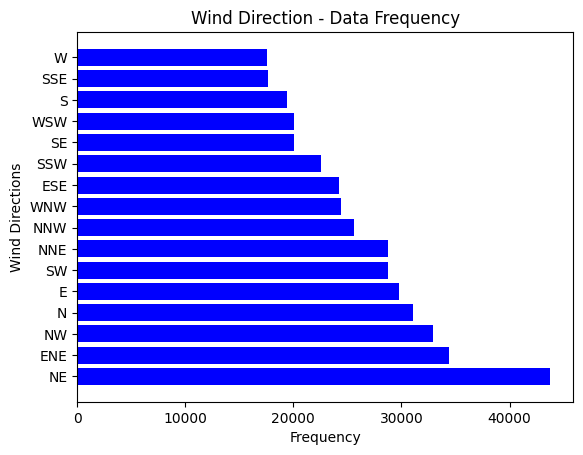

Number of Wind Direction 
WinDir
NE     43699
ENE    34376
NW     32902
N      31028
E      29752
SW     28756
NNE    28715
NNW    25606
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64


In [ ]:
# Number of sample according to WinDir
plt.figure()
plt.barh(data["WinDir"].value_counts().index, data["WinDir"].value_counts(), color = "b")
#plt.xticks(data["WinDir"].values)
plt.xlabel("Frequency")
plt.ylabel("Wind Directions")
plt.title("Wind Direction - Data Frequency")
plt.show()
print(f"Number of Wind Direction \n{data['WinDir'].value_counts()}")

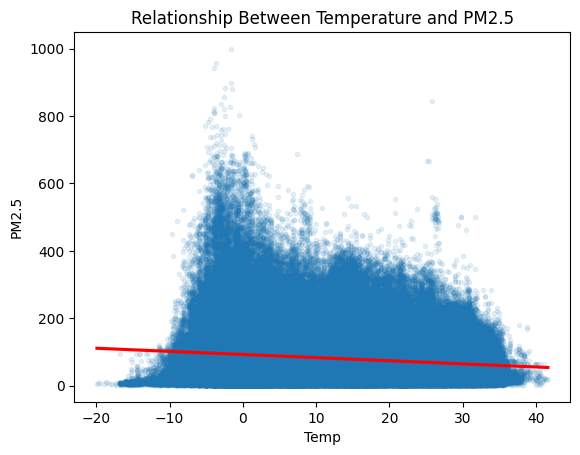

In [ ]:
sns.regplot(x='Temp', y='PM2.5', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and PM2.5')
plt.show()

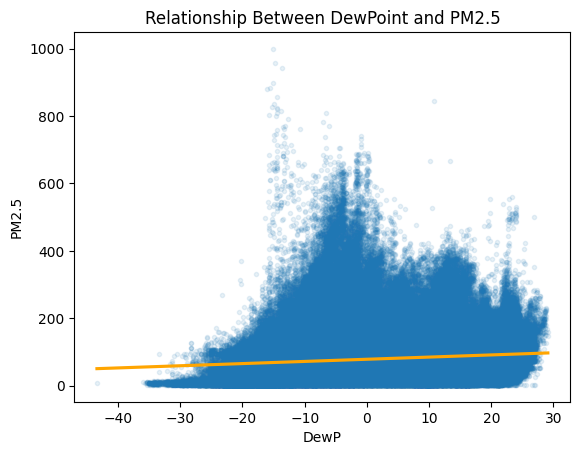

In [ ]:
sns.regplot(x='DewP', y='PM2.5', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"orange"})
plt.title('Relationship Between DewPoint and PM2.5')
plt.show()

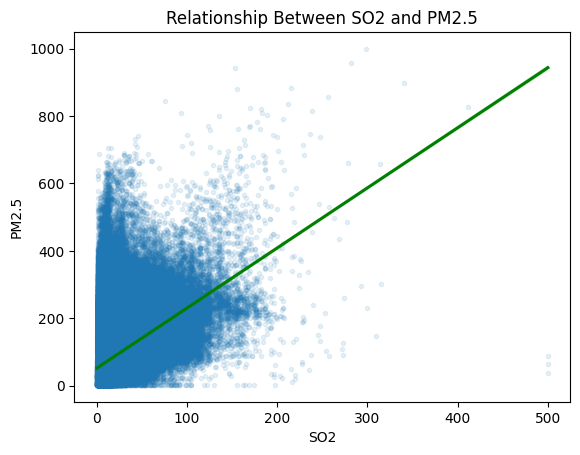

In [ ]:
sns.regplot(x='SO2', y='PM2.5', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"green"})
plt.title('Relationship Between SO2 and PM2.5')
plt.show()

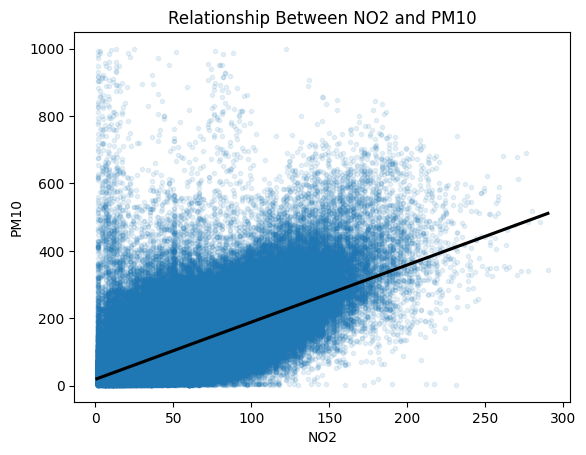

In [ ]:
sns.regplot(x='NO2', y='PM10', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"black"})
plt.title('Relationship Between NO2 and PM10')
plt.show()

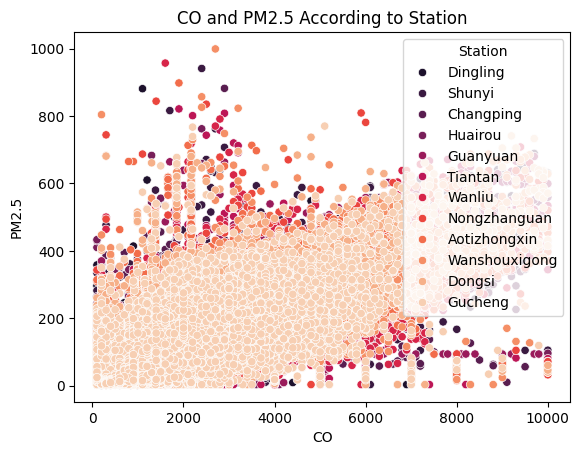

In [ ]:
sns.scatterplot(x='CO', y='PM2.5', hue='Station', data=data, palette = "rocket")
plt.title('CO and PM2.5 According to Station')
plt.show()

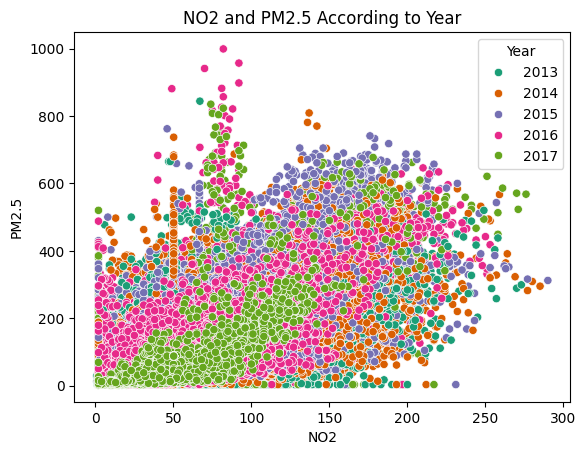

In [ ]:
sns.scatterplot(x='NO2', y='PM2.5', hue='Year', data=data, palette = "Dark2")
plt.title('NO2 and PM2.5 According to Year')
plt.show()

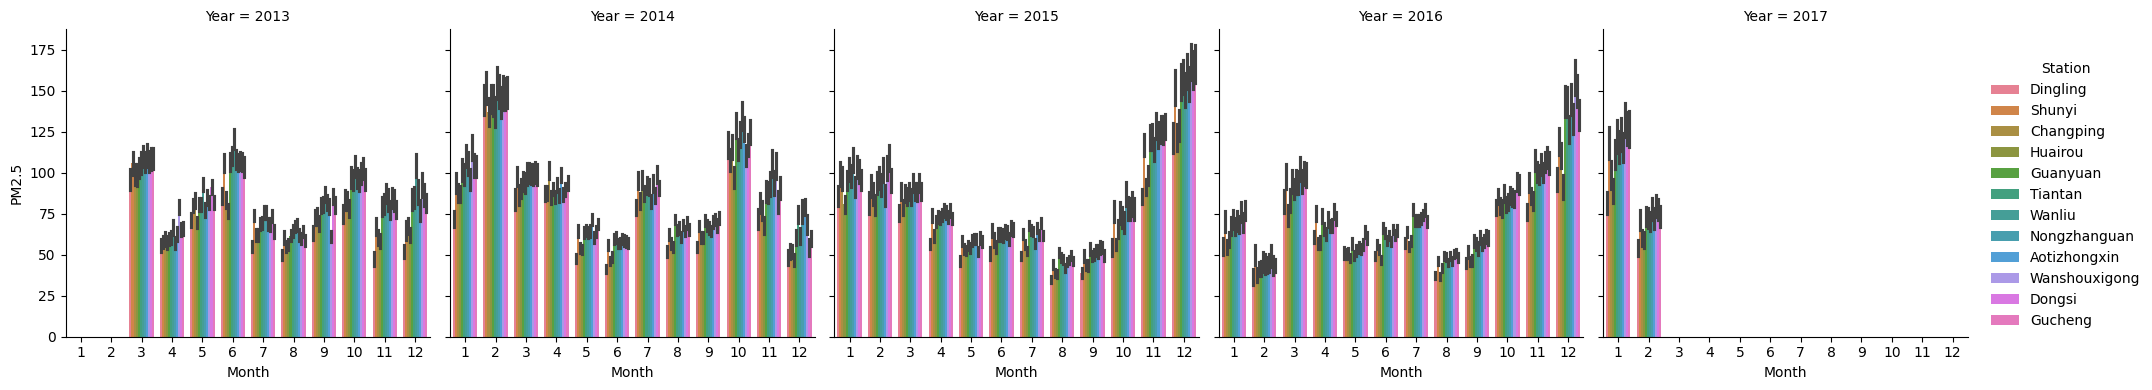

In [ ]:
sns.catplot(x="Month", y="PM2.5",  hue="Station", col="Year",
                data=data, kind="bar", height=4)
plt.show()

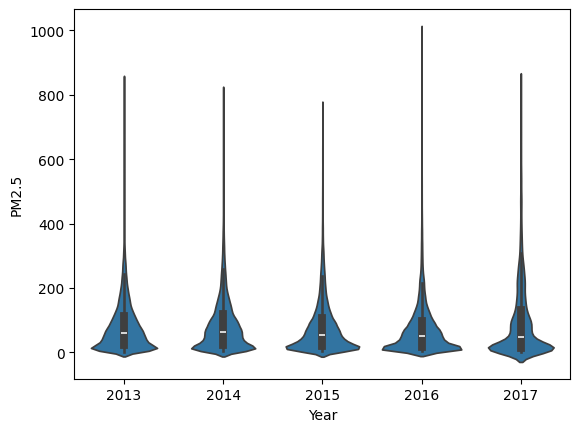

In [ ]:
sns.violinplot(x="Year", y="PM2.5", data=data)
plt.show()

### Yearly Analysis

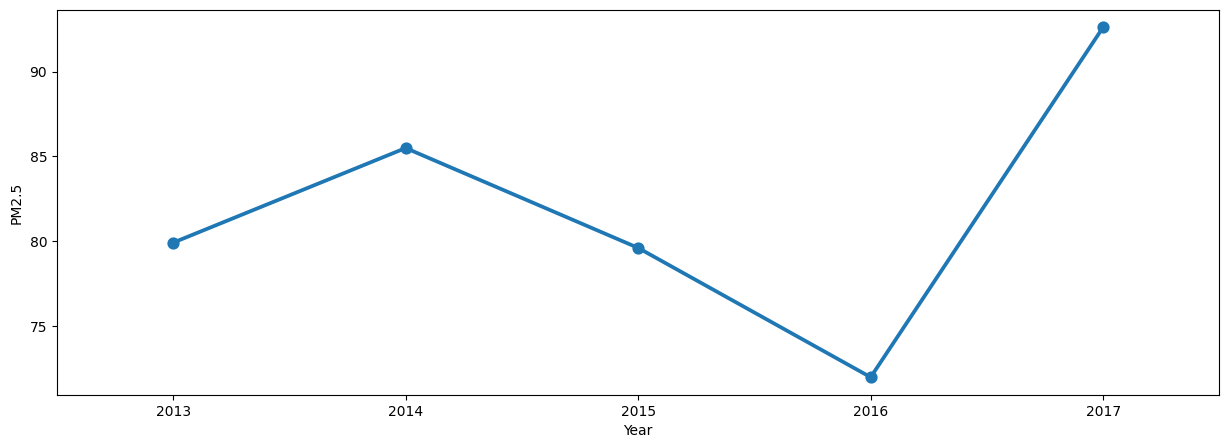

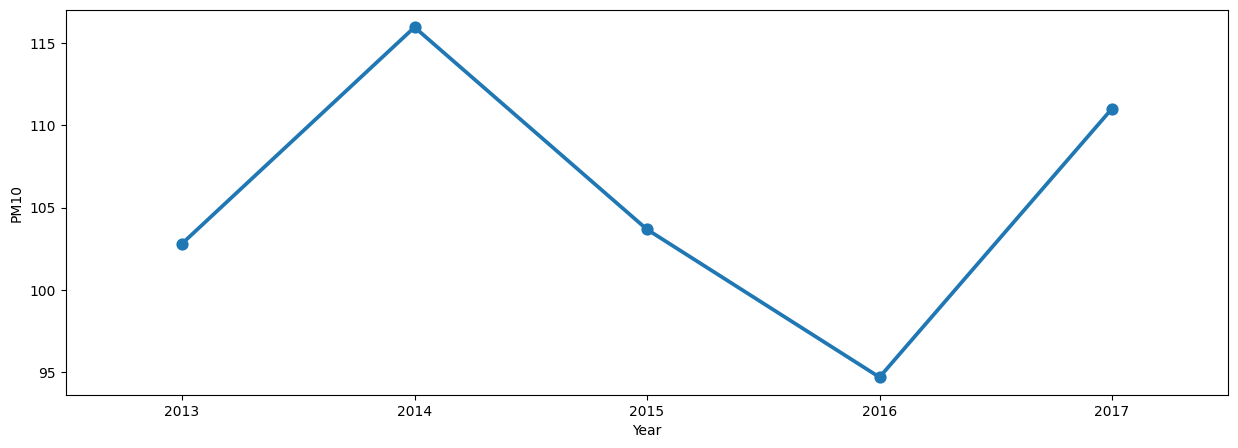

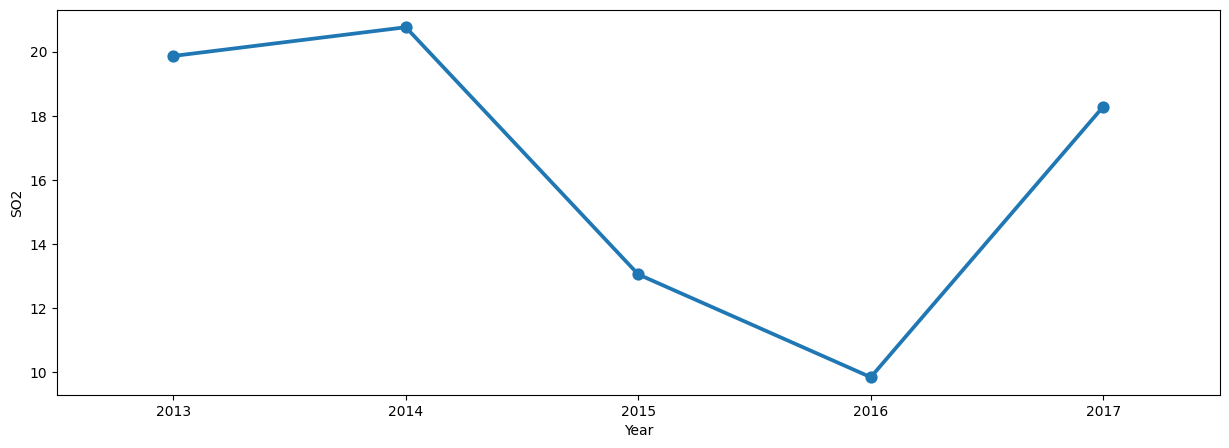

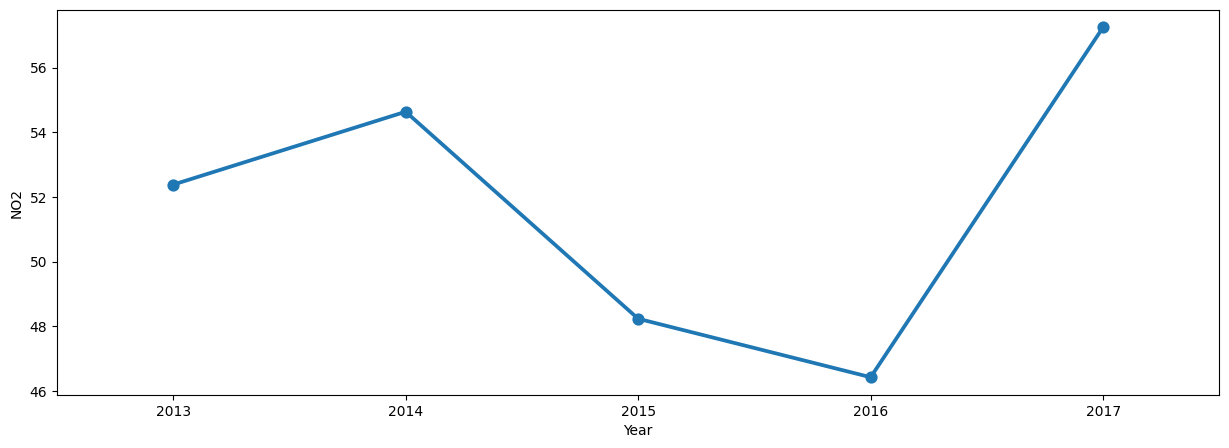

In [ ]:
compounds = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
for i in compounds:    
    df = data[[i, 'Year']].groupby(["Year"]).mean().reset_index().sort_values(by='Year', ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=df)

### Monthly Analysis

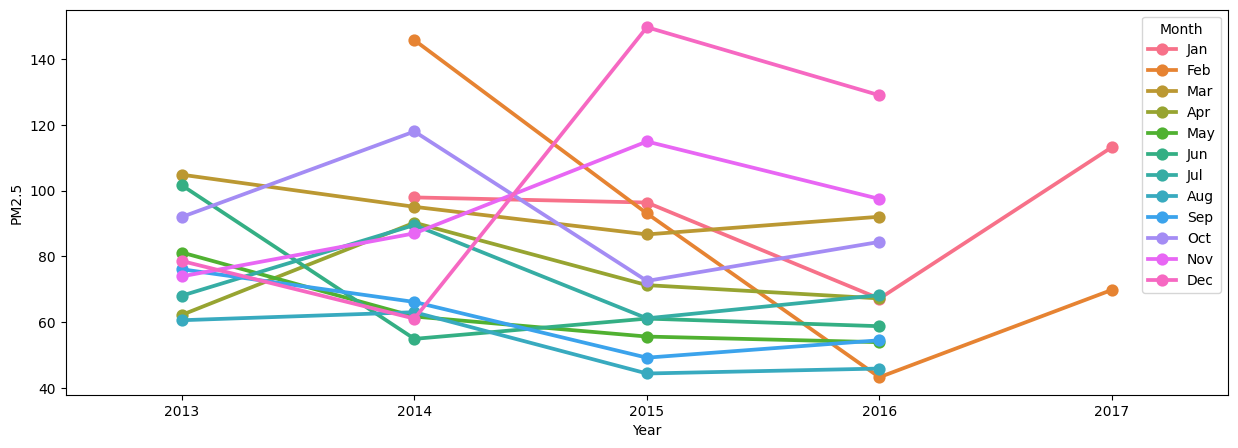

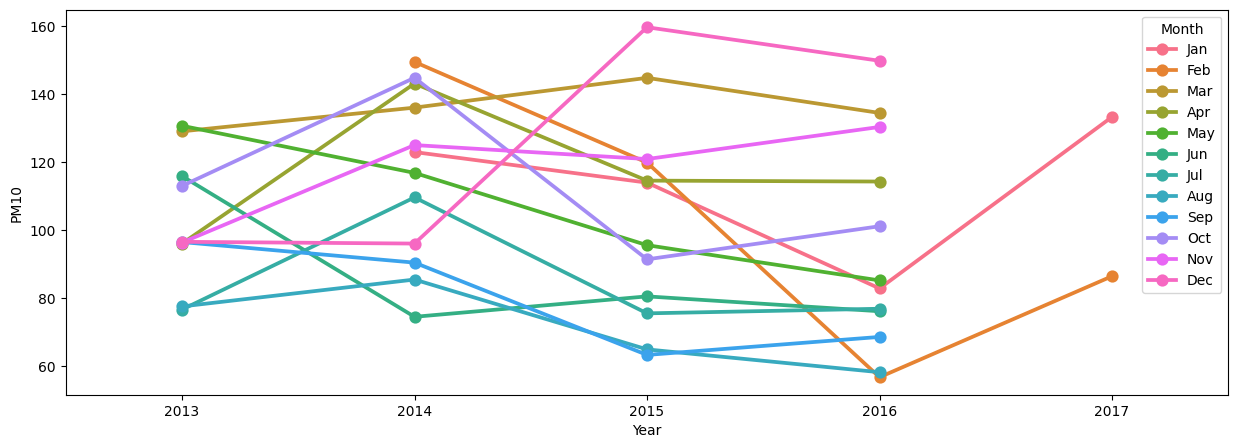

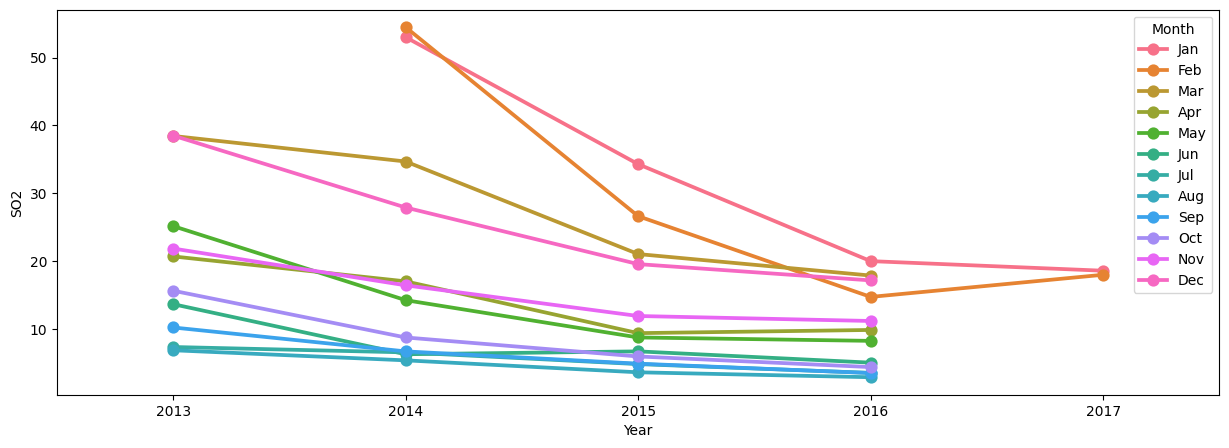

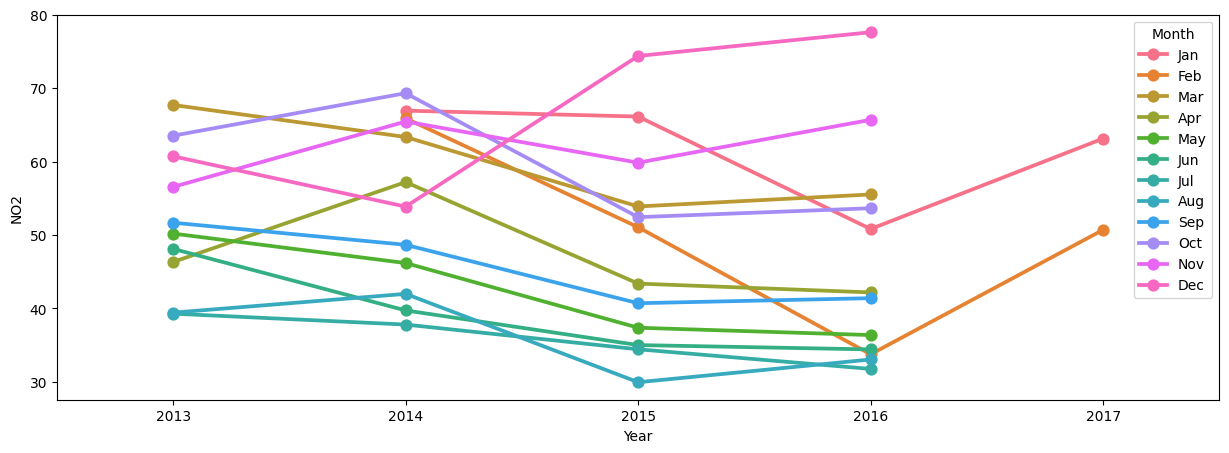

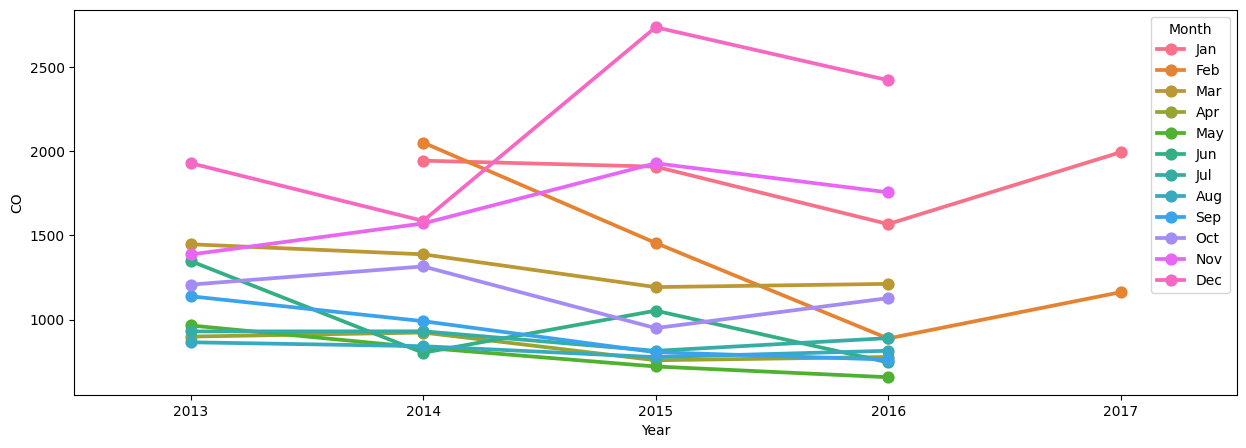

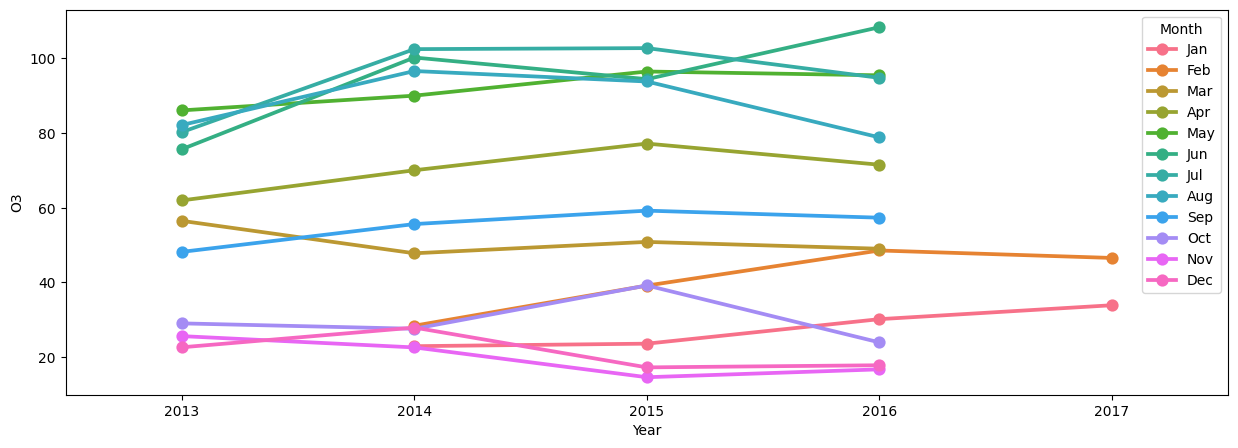

In [ ]:
for i in compounds:
    temp_data = data.copy()
    temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                           'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'Month', 'Year',]].groupby(["Year",
                                                    "Month"]).mean().reset_index().sort_values(by=['Year',
                                                                                                   'Month'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=df, hue='Month', hue_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                                  'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

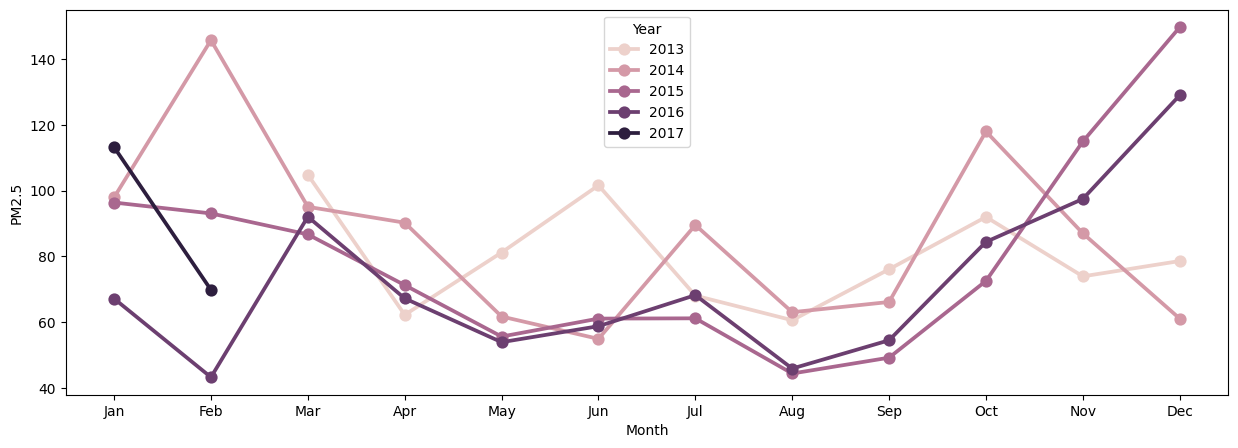

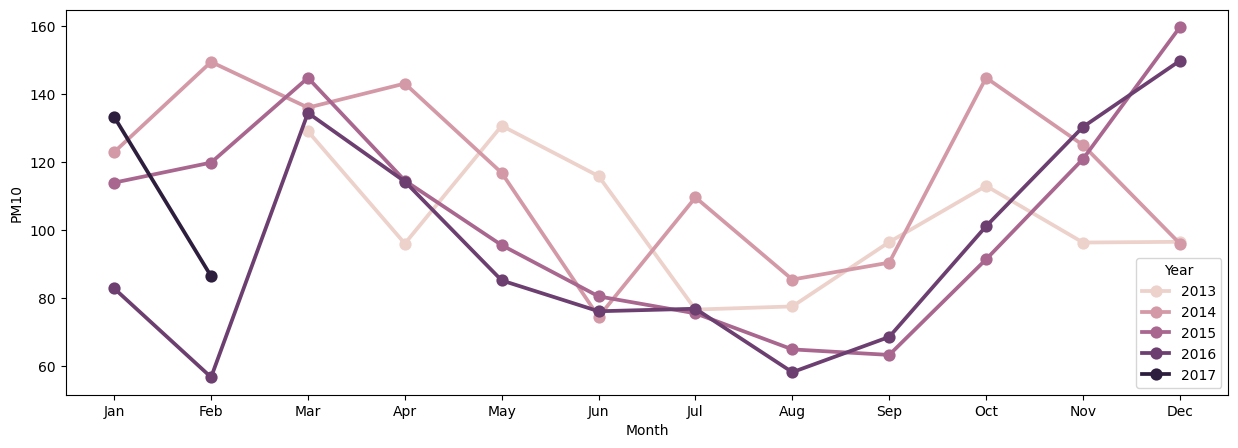

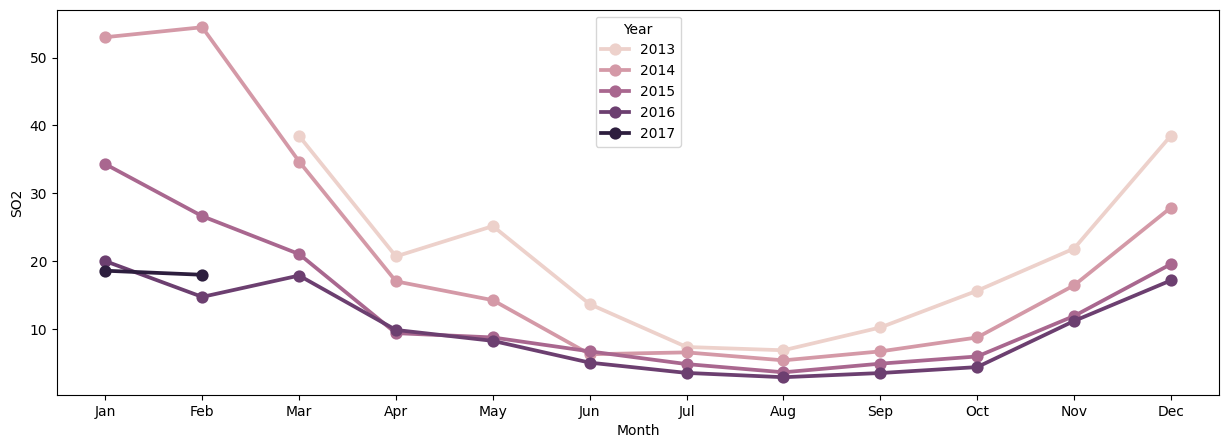

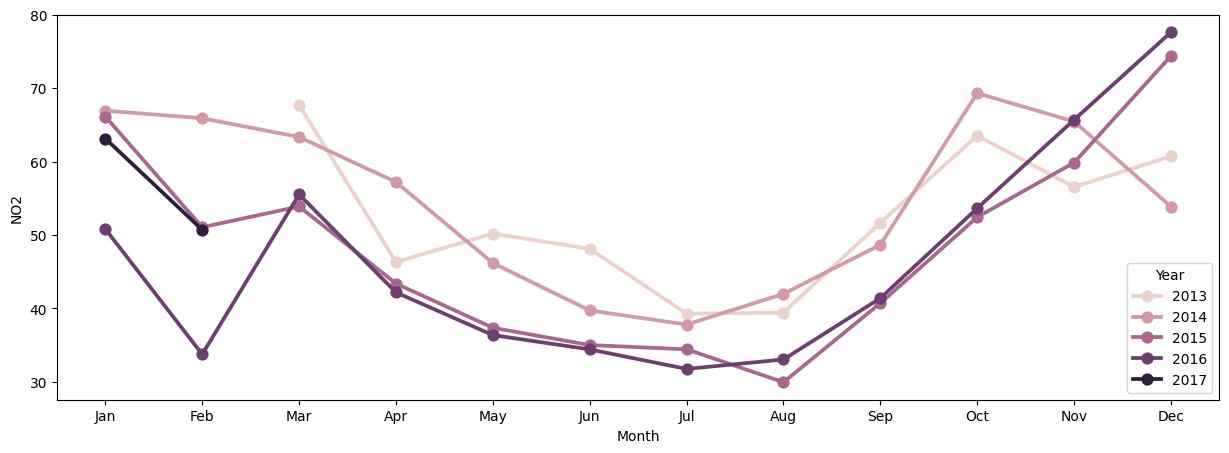

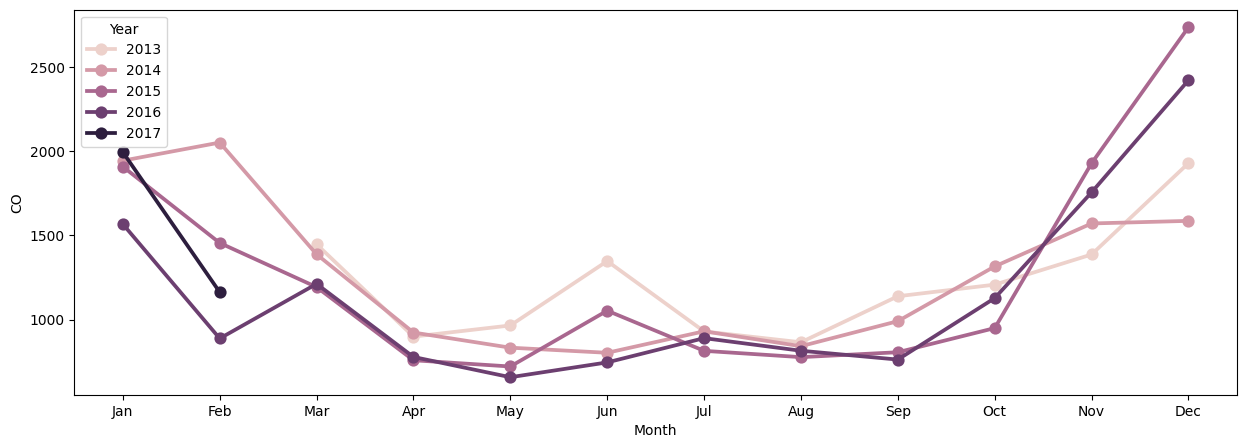

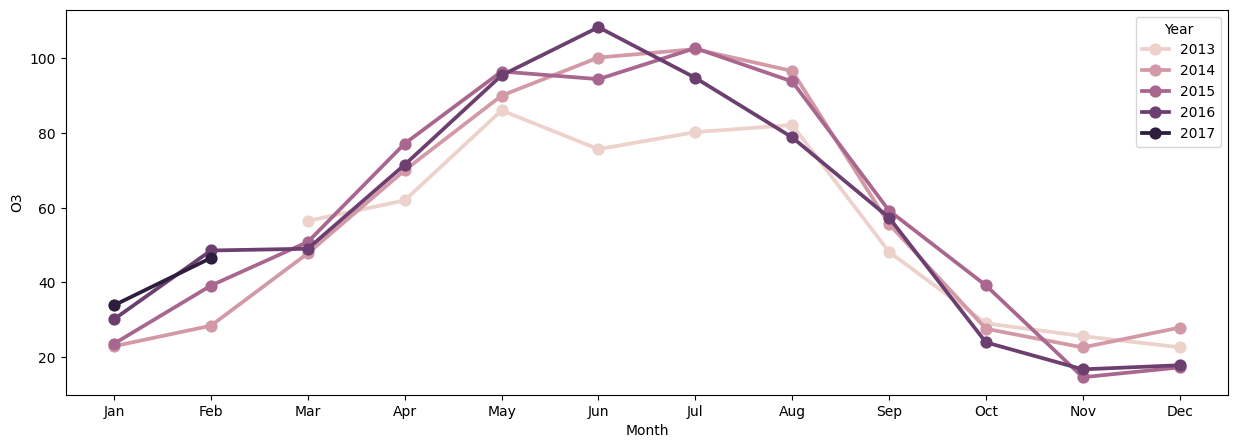

In [ ]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
for i in compounds:    
    temp_data = data.copy()
    temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                               'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'Month', 'Year']].groupby(["Year",
                                                  "Month"]).mean().reset_index().sort_values(by=['Year', 
                                                                                                 'Month'], ascending=True)
    df = df.iloc[df['Month'].map(custom_dict).argsort()]
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Month', y=i, data=df, hue="Year")

### Weekly Analysis

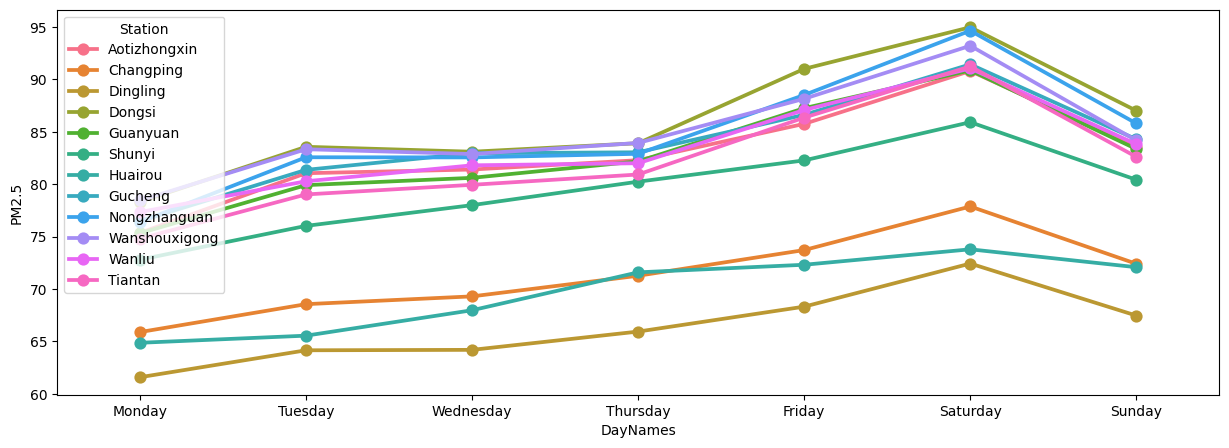

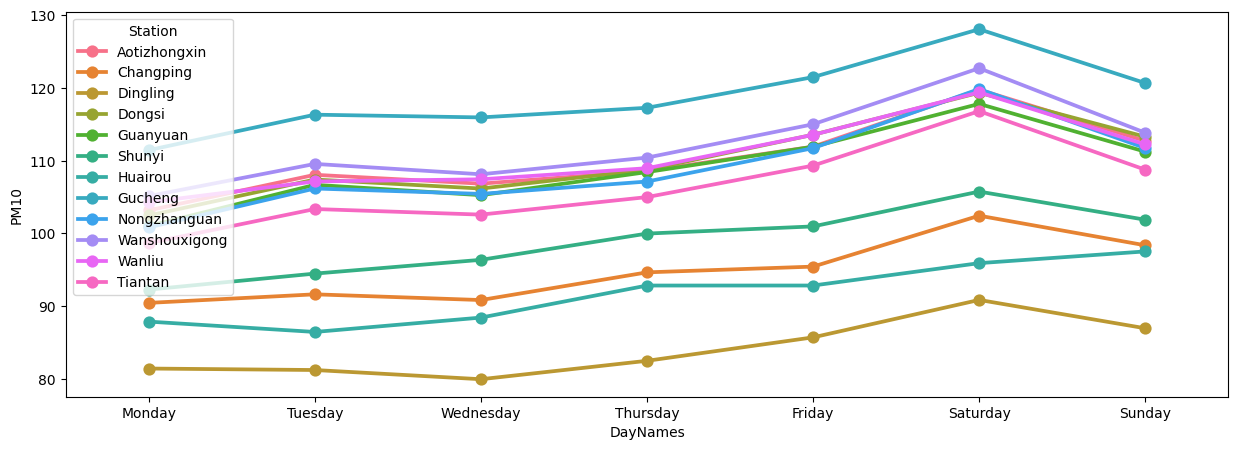

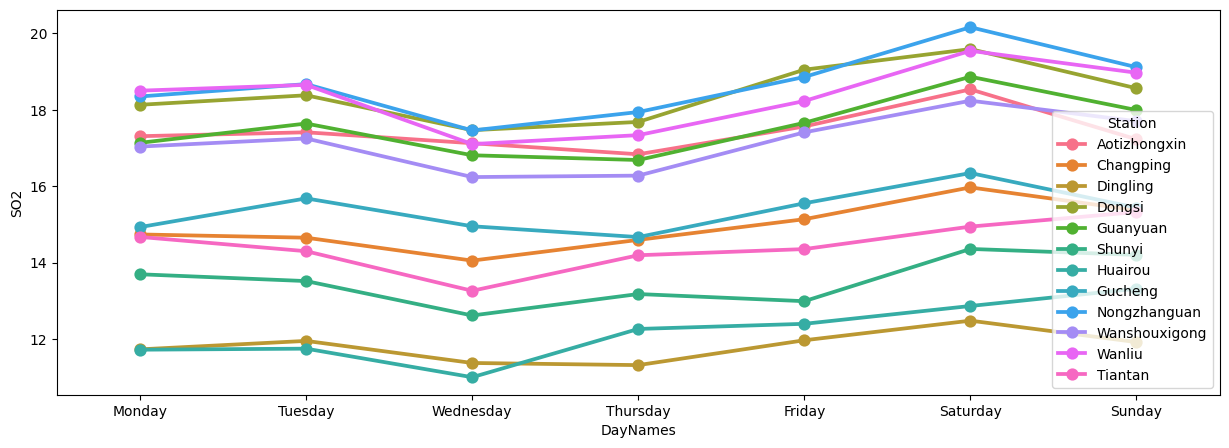

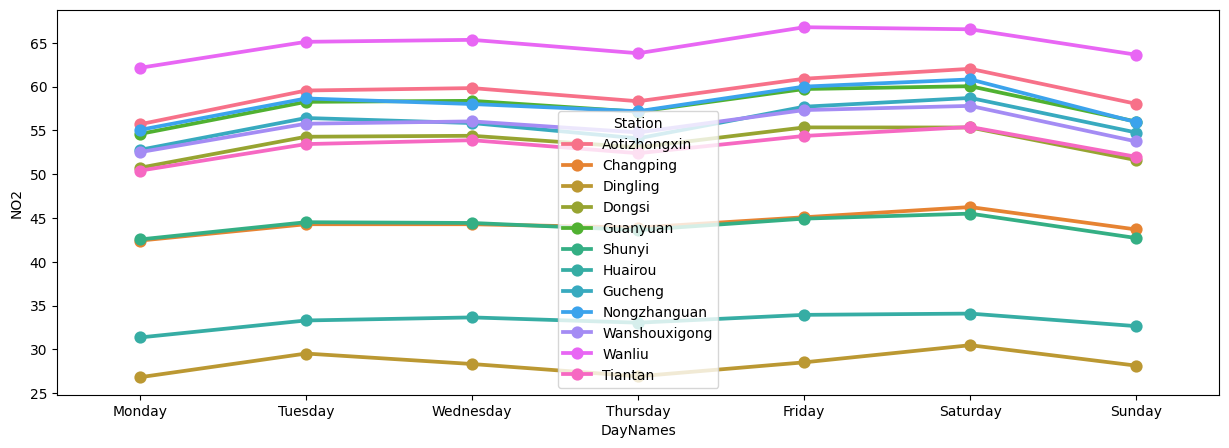

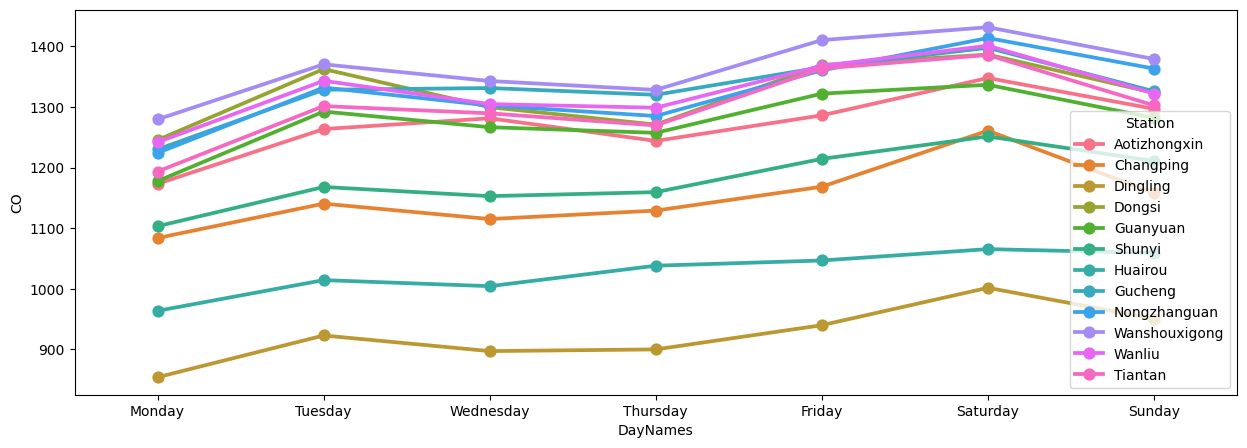

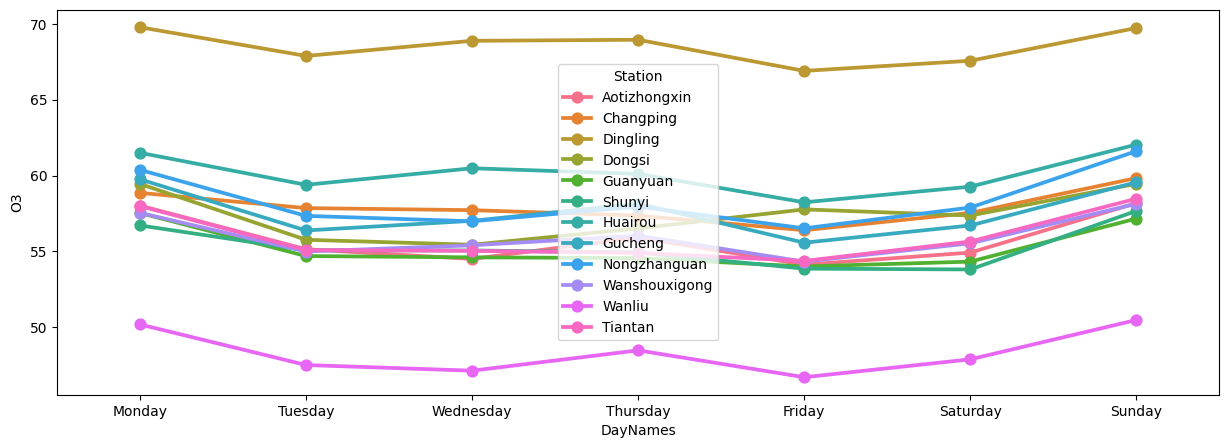

In [ ]:
custom_day = {'Monday':0, 'Tuesday':1, 'Wednesday':2,
              'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
for i in compounds:
    df = data[[i, 'DayNames',
               'Station']].groupby(["Station",
                                    "DayNames"]).mean().reset_index().sort_values(by=['Station',
                                                                                      'DayNames'], ascending=True)
    df = df.iloc[df['DayNames'].map(custom_day).argsort()]
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='DayNames', y=i, data=df, hue="Station")

### Hourly Analysis

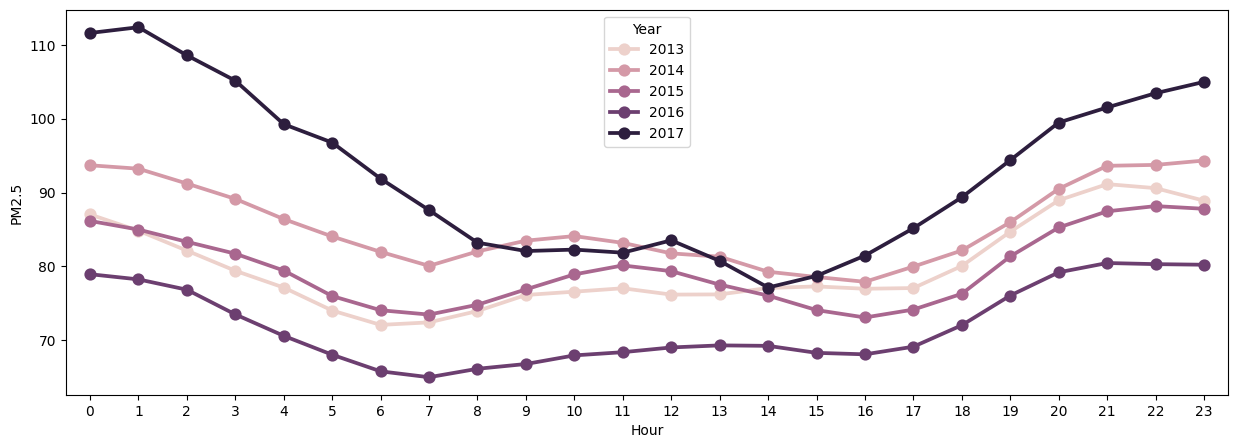

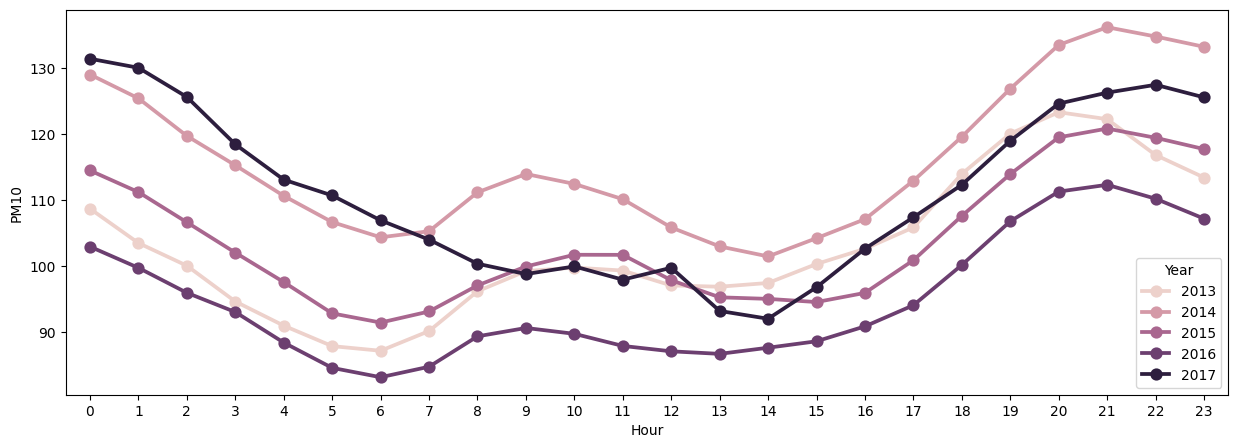

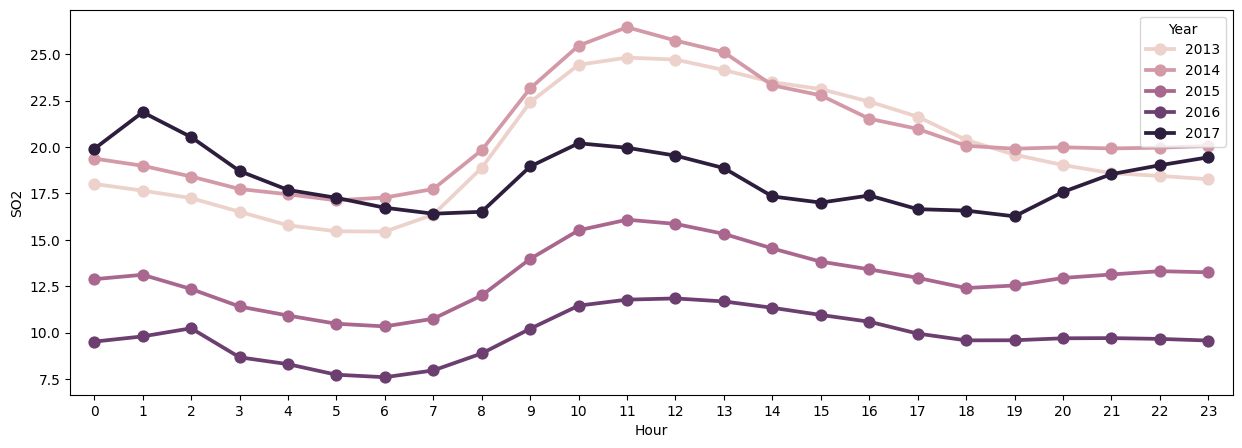

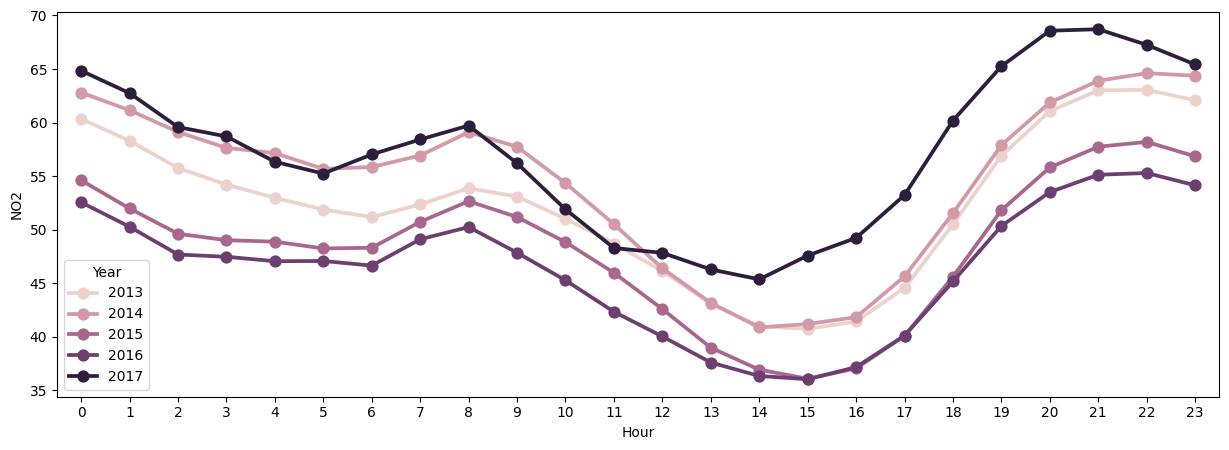

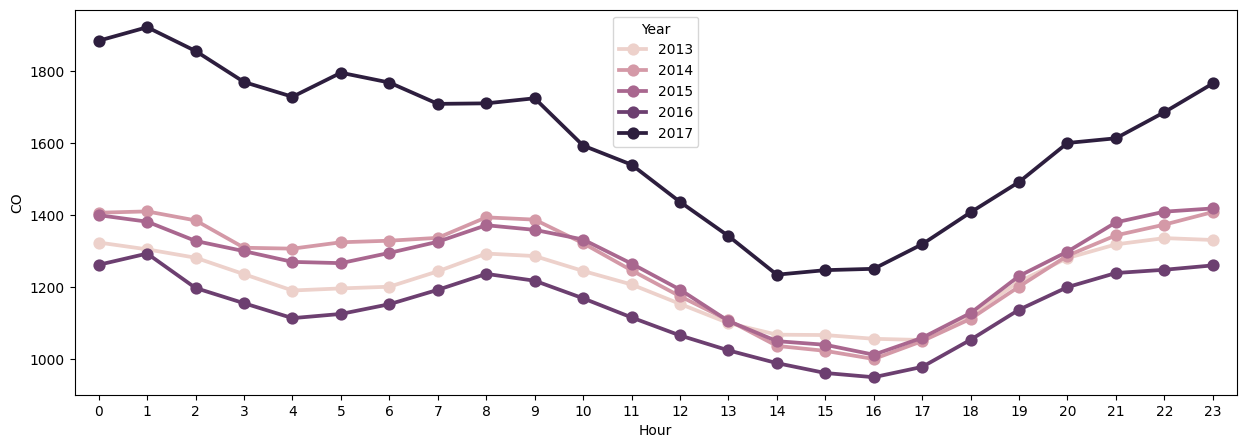

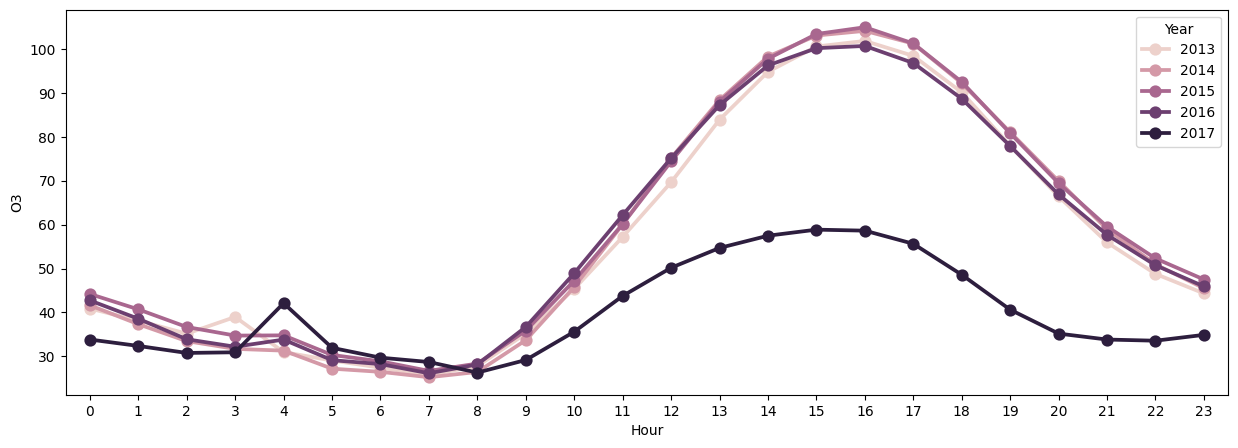

In [ ]:
for i in compounds:   
    df = data[[i, 'Hour', 'Year']].groupby(["Year",
                                                 "Hour"]).mean().reset_index().sort_values(by=['Year',
                                                                                                 'Hour'], ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='Hour', y=i, data=df, hue="Year")
    plt.show()

### Station Based Analysis

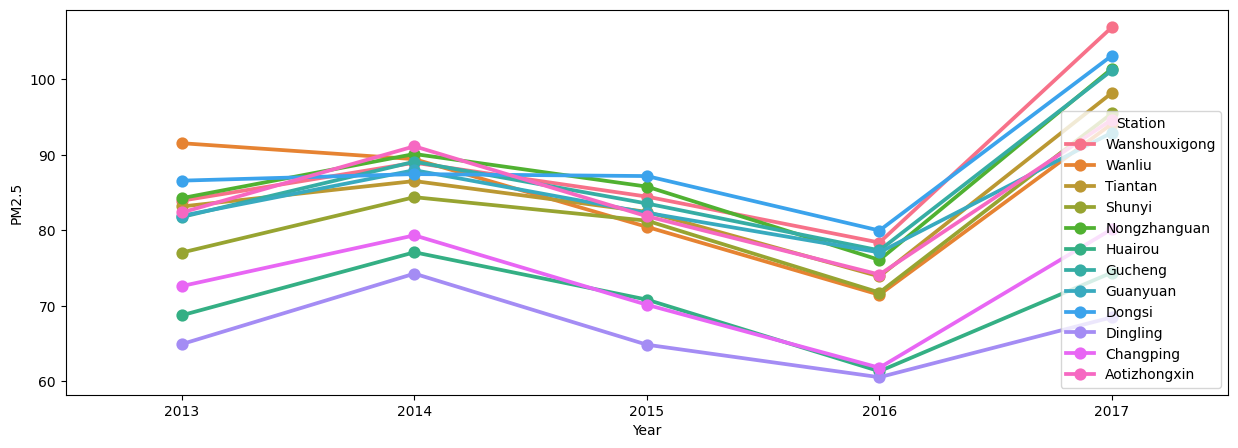

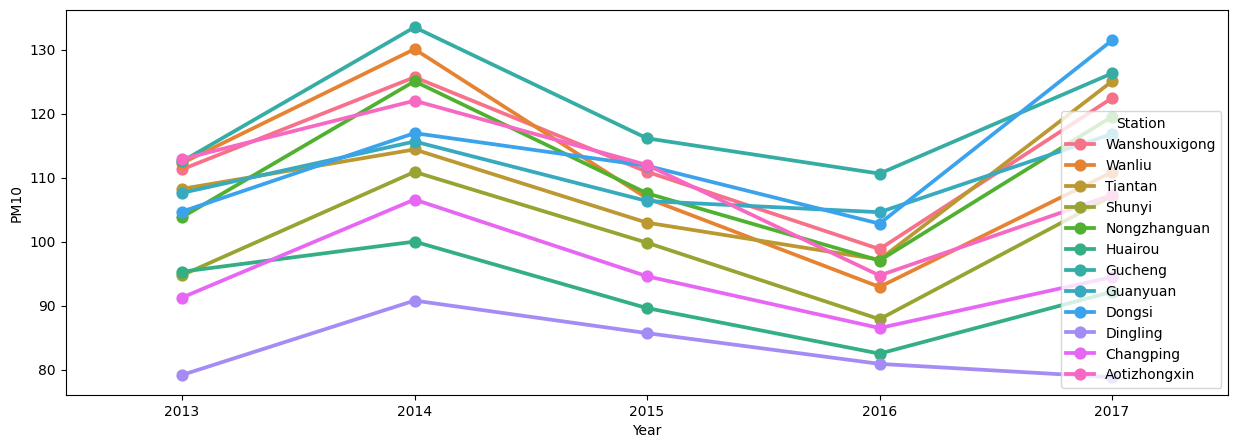

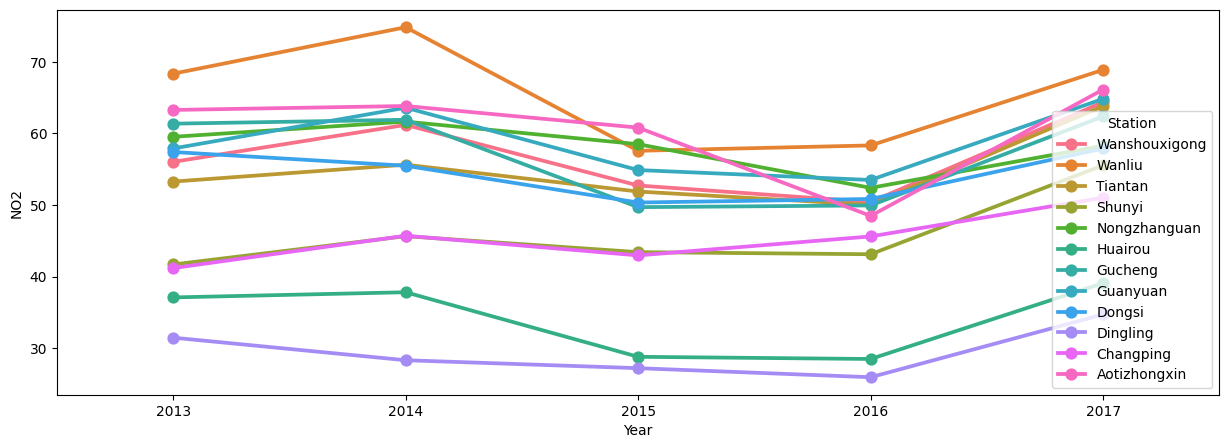

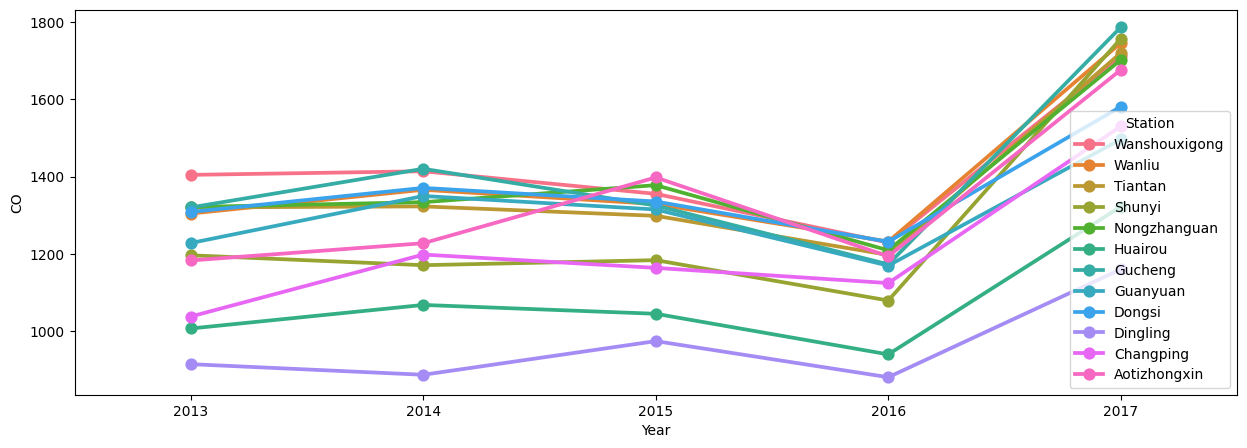

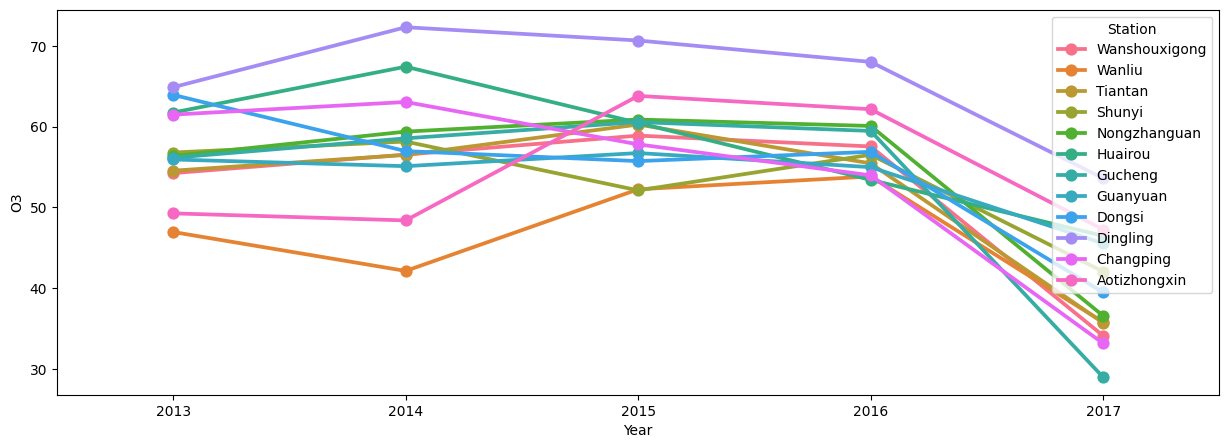

In [ ]:
for i in compounds:  
    df = data[[i, 'Year', 'Station']].groupby(["Year",
                                               "Station"]).mean().reset_index().sort_values(by=['Station',
                                                                                                'Year'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=df, hue="Station")
    plt.show()

## Preprocessing

In [ ]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Year      420768 non-null  int64         
 1   Month     420768 non-null  int64         
 2   Day       420768 non-null  int64         
 3   Hour      420768 non-null  int64         
 4   PM2.5     420768 non-null  float64       
 5   PM10      420768 non-null  float64       
 6   SO2       420768 non-null  float64       
 7   NO2       420768 non-null  float64       
 8   CO        420768 non-null  float64       
 9   O3        420768 non-null  float64       
 10  Temp      420768 non-null  float64       
 11  Press     420768 non-null  float64       
 12  DewP      420768 non-null  float64       
 13  Rain      420768 non-null  float64       
 14  WinDir    420768 non-null  object        
 15  WinSpeed  420768 non-null  float64       
 16  Station   420768 non-null  object        
 1

In [ ]:
# drop some columns and reduce memory
data.drop(["DayNames", "Date", "PM10", "Year", "Month", "Day", "Hour"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PM2.5     420768 non-null  float64
 1   SO2       420768 non-null  float64
 2   NO2       420768 non-null  float64
 3   CO        420768 non-null  float64
 4   O3        420768 non-null  float64
 5   Temp      420768 non-null  float64
 6   Press     420768 non-null  float64
 7   DewP      420768 non-null  float64
 8   Rain      420768 non-null  float64
 9   WinDir    420768 non-null  object 
 10  WinSpeed  420768 non-null  float64
 11  Station   420768 non-null  object 
dtypes: float64(10), object(2)
memory usage: 41.7+ MB


In [30]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [ ]:
categorical_variables = ["WinDir", "Station"]
for i in categorical_variables:
    print(f"For {i} column ")
    data[f"{i}"] = labelEncoder(data[f"{i}"])
    print("**********************************")

For WinDir column 
Encoding Approach:
E  ==>  0
ENE  ==>  1
NNE  ==>  5
N  ==>  3
NNW  ==>  6
NW  ==>  7
NE  ==>  4
SW  ==>  12
SSW  ==>  11
WSW  ==>  15
ESE  ==>  2
SE  ==>  9
S  ==>  8
WNW  ==>  14
SSE  ==>  10
W  ==>  13
**********************************
For Station column 
Encoding Approach:
Dingling  ==>  2
Shunyi  ==>  8
Changping  ==>  1
Huairou  ==>  6
Guanyuan  ==>  4
Tiantan  ==>  9
Wanliu  ==>  10
Nongzhanguan  ==>  7
Aotizhongxin  ==>  0
Wanshouxigong  ==>  11
Dongsi  ==>  3
Gucheng  ==>  5
**********************************


In [32]:
data.head()

PM2.5  SO2    NO2     CO    O3  Temp   Press  DewP  Rain  WinDir  WinSpeed  \
0    4.0  3.0  60.12  200.0  82.0  -2.3  1020.8 -19.7   0.0       0       0.5   
1    7.0  3.0  60.12  200.0  80.0  -2.5  1021.3 -19.0   0.0       1       0.7   
2    5.0  3.0   2.00  200.0  79.0  -3.0  1021.3 -19.9   0.0       1       0.2   
3    6.0  3.0  60.12  200.0  79.0  -3.6  1021.8 -19.1   0.0       5       1.0   
4    5.0  3.0  60.12  200.0  81.0  -3.5  1022.3 -19.4   0.0       3       2.1   

   Station  
0        2  
1        2  
2        2  
3        2  
4        2

In [44]:
data.shape

(420768, 12)

In [33]:
# create input and output
X = data.drop('PM2.5', axis = 1)
y = data['PM2.5']

In [45]:
# for train test split
from sklearn.model_selection import TimeSeriesSplit

n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)



## Model Training and Evaluation

In [78]:
# import libraries
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.processing_forecasts.metrics import Evaluate

# make a function that include all regression models
def allRegressors(X_train, X_test, y_train, y_test,run_id):
    """
    This function use multiple machine learning regressors and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) for each regressors and
    comparison plot for regressors according to RMSE and MAE
    """
    Regressors = [LinearRegression(), RandomForestRegressor(), XGBRegressor(), LGBMRegressor(),
                  KNeighborsRegressor()]
                # add ARIMA   , FFT
    for reg in Regressors:
        reg.set_params(n_jobs=-1)

    mae_dict = {}
    mae_scores = []
    rmse_dict = {}
    rmse_scores = []
    overlay_dict = {}
    overlay_scores = []
    
    # function for mean absolute error
    def maeScore(regressor):
        """
        :param regressor: regressor model function
        :return: mean absolute error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        mae_score = mean_absolute_error(y_test, pred)
        return mae_score
    
    # function for root mean square error
    def rmseScore(regressor):
        """
        :param regressor: regressor model function
        :return: root mean score error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse_score = np.sqrt(mean_squared_error(y_test, pred))
        return rmse_score
    
    def overlay_score(regressor):
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        metrics_eval = Evaluate(y_test,pred)
        overlay_score = metrics_eval.overlay_dx_area_under_curve_metric(
                    pred,
                    100,
                    0,
                    0.1
                )
        return overlay_score

        
    # mean absolute error, root mean square error for each regressors
    for regressor in Regressors:
        name = regressor.__class__.__name__
        mae_dict[name] = maeScore(regressor)
        mae_scores.append(mae_dict[name])
        rmse_dict[name] = rmseScore(regressor)
        rmse_scores.append(rmse_dict[name])
        overlay_dict[name] = overlay_score(regressor)
        overlay_scores.append(overlay_dict[name])

        print("*************************************************************************")
        print(f"{name} Mean Absolute Error = {mae_dict[name]}")
        print(f"{name} Root Mean Square Error = {rmse_dict[name]}")
        print(f"{name} overlay similarity = {overlay_dict[name]}")
        
    #Plotting the performance of regressors
    def plotPerformance(scores_list, scores_dict, metric:str):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include regressors and evaluation scores
        :param metric: metric name y axis 
        :return: plot of performance comparison of regressors
        """
        
        N = len(Regressors)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Regressors")
        plt.title("Performance Comparison of Regressors")
        plt.ylabel(f"{metric} Error")
        plt.xticks(x, scores_dict.keys(), rotation=90)
        plt.yticks(np.arange(0, np.max(scores_list), np.max(scores_list)/len(scores_list)))
        plt.show()
    def save_results(rmse,mae,overlay):
        df = pd.DataFrame({
        "Model": rmse.keys(),
        "RMSE": rmse.values(),
        "MAE": mae.values(),
        "Overlay": overlay.values(),
    })
        df.to_csv(f"metrics_run{run_id}.csv")
        return df
    # call the functions
    save_results(rmse_dict,mae_dict,overlay_dict)
    plotPerformance(mae_scores, mae_dict, "Mean Absolute")
    plotPerformance(rmse_scores, rmse_dict, "Root Mean Square")
    plotPerformance(overlay_scores,overlay_dict,"overlay similarity")

1000
*************************************************************************
LinearRegression Mean Absolute Error = 31.197489035123063
LinearRegression Root Mean Square Error = 44.20083166262524
LinearRegression overlay similarity = 0.93
1000
*************************************************************************
RandomForestRegressor Mean Absolute Error = 25.955770050954442
RandomForestRegressor Root Mean Square Error = 38.87234055958115
RandomForestRegressor overlay similarity = 0.94
1000
*************************************************************************
XGBRegressor Mean Absolute Error = 27.576662539276818
XGBRegressor Root Mean Square Error = 41.25584390465528
XGBRegressor overlay similarity = 0.94
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1841
[LightGBM] [Info] Number of data points in the train set: 105192, number of used 

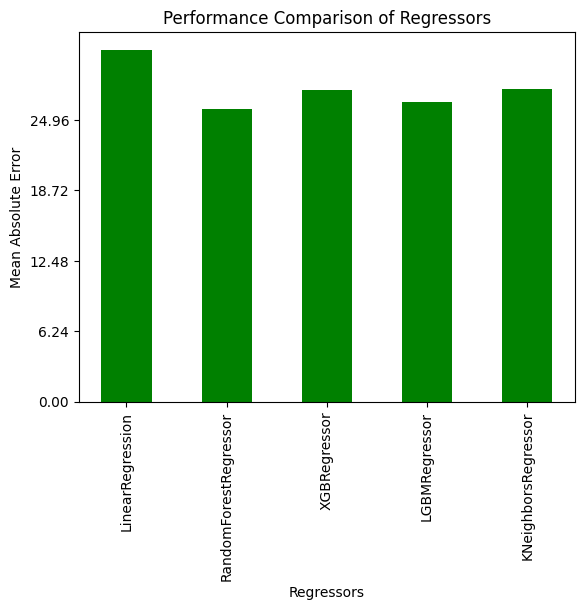

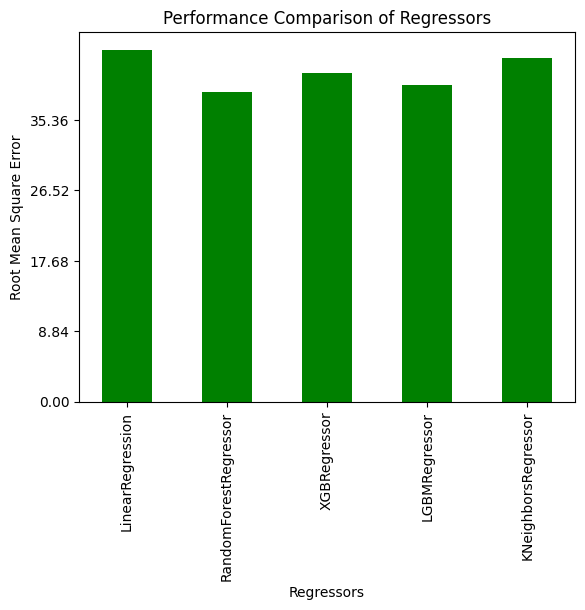

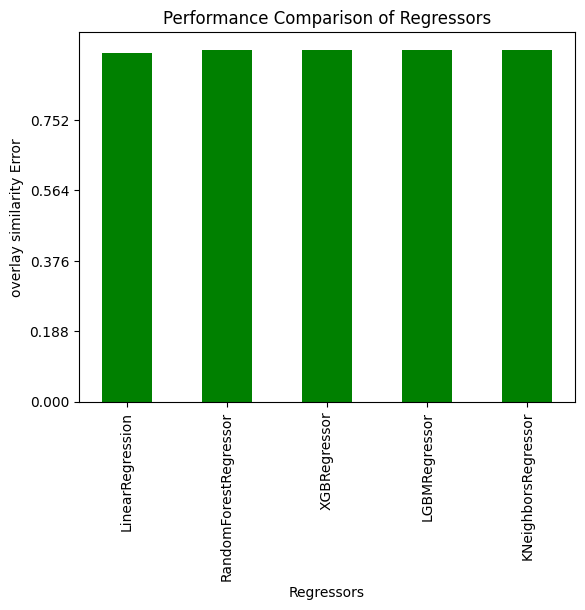

1000
*************************************************************************
LinearRegression Mean Absolute Error = 33.465768806262766
LinearRegression Root Mean Square Error = 47.79644178552309
LinearRegression overlay similarity = 0.93
1000
*************************************************************************
RandomForestRegressor Mean Absolute Error = 23.872142602099018
RandomForestRegressor Root Mean Square Error = 36.868158367370995
RandomForestRegressor overlay similarity = 0.95
1000
*************************************************************************
XGBRegressor Mean Absolute Error = 25.92832799772478
XGBRegressor Root Mean Square Error = 39.34933408364759
XGBRegressor overlay similarity = 0.95
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 210384, number of used 

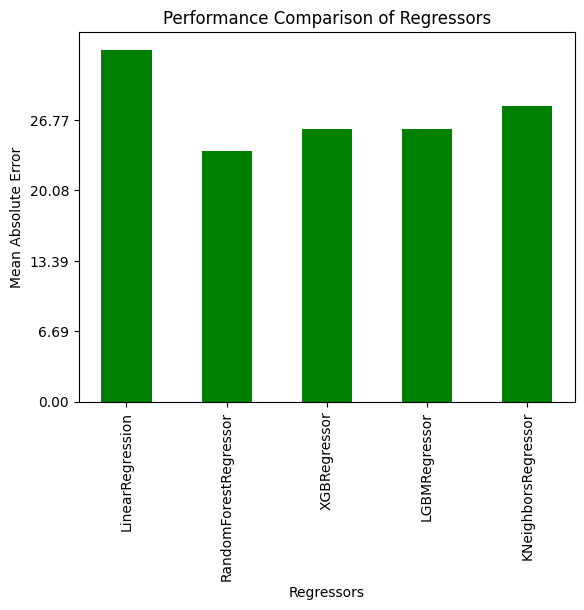

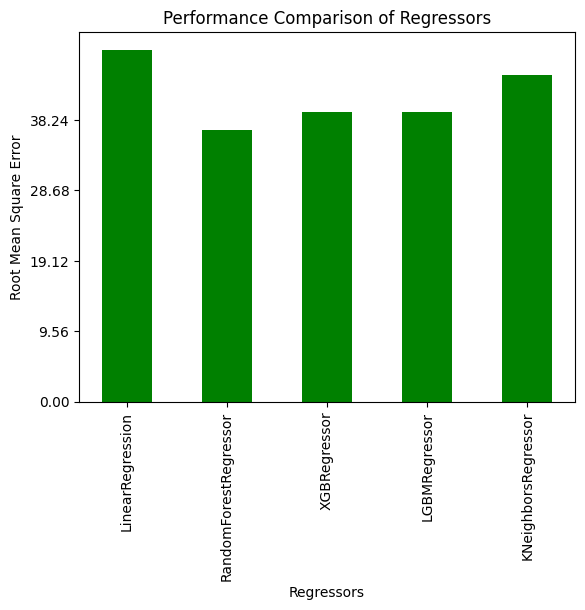

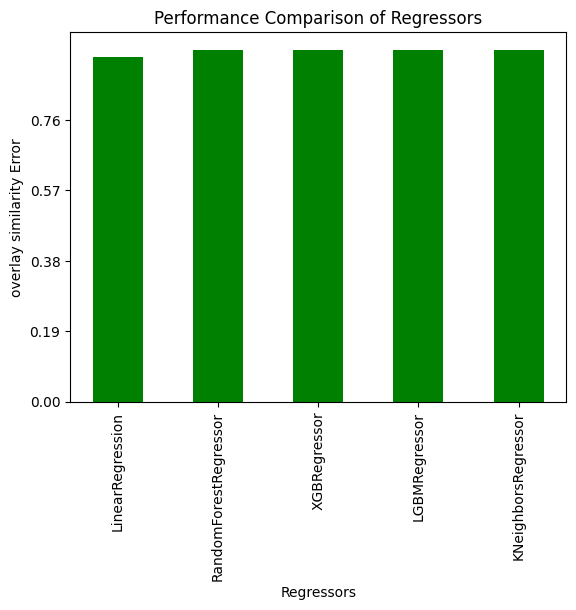

1000
*************************************************************************
LinearRegression Mean Absolute Error = 32.02809521496021
LinearRegression Root Mean Square Error = 47.409888503764606
LinearRegression overlay similarity = 0.94
1000
*************************************************************************
RandomForestRegressor Mean Absolute Error = 23.259220532930264
RandomForestRegressor Root Mean Square Error = 36.205606154286414
RandomForestRegressor overlay similarity = 0.96
1000
*************************************************************************
XGBRegressor Mean Absolute Error = 26.670820717760865
XGBRegressor Root Mean Square Error = 40.33582376301565
XGBRegressor overlay similarity = 0.95
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 315576, number of used

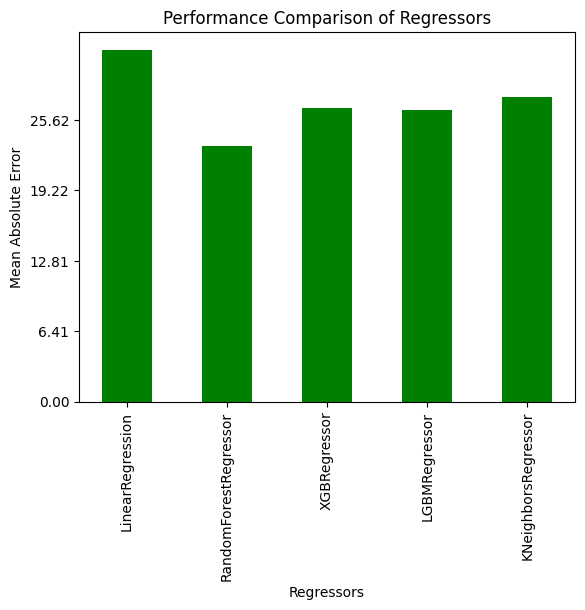

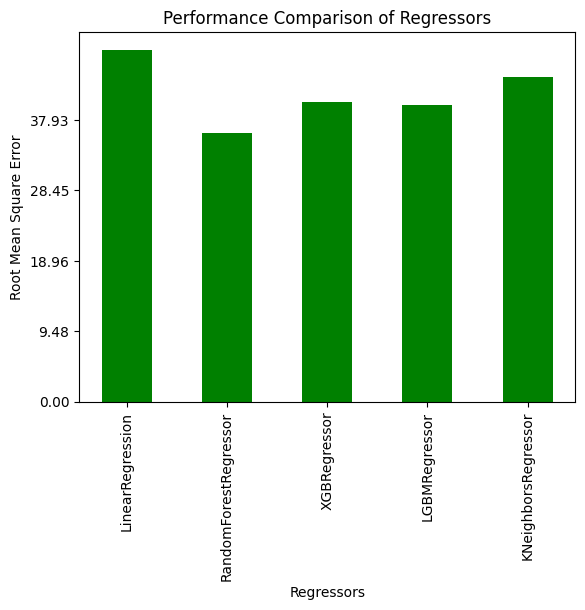

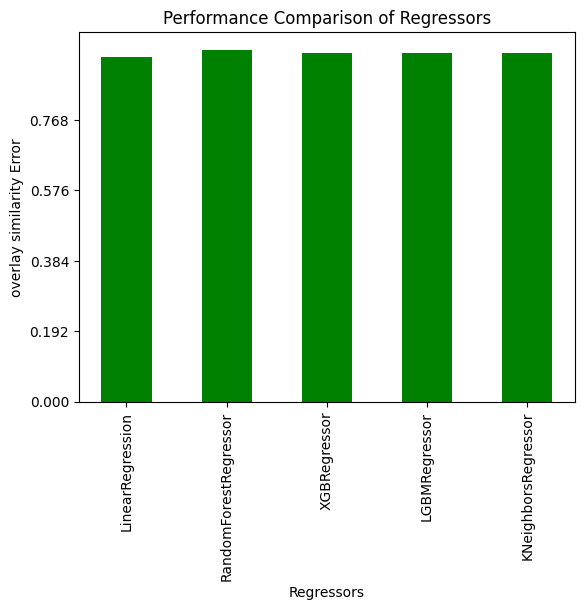

In [79]:
for i, (train_index, test_index) in enumerate(tscv.split(data)):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    allRegressors(X_train, X_test, y_train, y_test,run_id=i)



## Hyperparameter Optimization

In [39]:
# Choose the best model for tuning
# RandomForestRegressor can be choose but it take to much time for GridSearchCV because of my CPU.
# Grid Search with Cross Validation
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)